In [25]:
import requests
import pickle
import time
import numpy as np
import networkx as nx
from time import sleep
from tqdm import tqdm
import matplotlib.pyplot as plt

In [27]:
with open('despair.pkl', 'rb') as f:
    G = pickle.load(f)

## Distances

In [28]:
G_undir = nx.to_undirected(G)

In [29]:
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc).copy()

avg_path_length = nx.average_shortest_path_length(G_scc)
print(f"Average path length (largest SCC): {avg_path_length:.4f}")

Average path length (largest SCC): 3.2877


In [5]:
largest_wcc = max(nx.weakly_connected_components(G), key=len)
G_wcc = G.subgraph(largest_wcc)
G_wcc_undirected = G_wcc.to_undirected()
avg_dist = nx.average_shortest_path_length(G_wcc_undirected)
avg_dist

5.541801063502645

In [6]:
avg_dist

5.541801063502645

In [30]:
dists = []
for node in G.nodes():
    sp = nx.single_source_shortest_path_length(G,node)
    dists.extend(sp.values())
dists

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


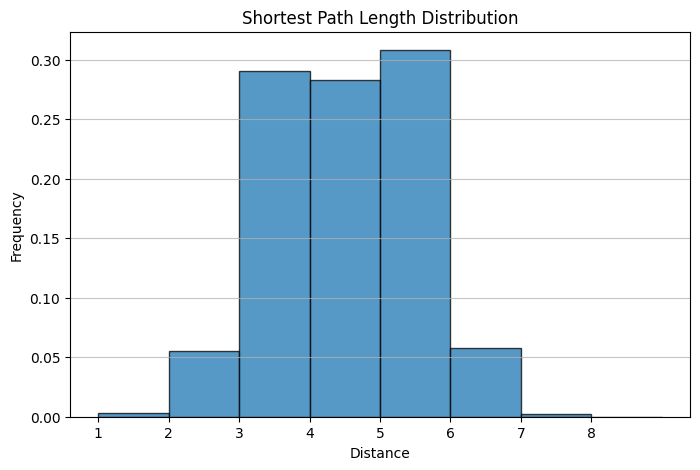

In [31]:
plt.figure(figsize=(8,5))
plt.hist(dists, bins=range(1, max(dists)+2), density=True, alpha=0.75, edgecolor='black')
plt.title("Shortest Path Length Distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.xticks(range(1, max(dists)+1))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Degree

In [32]:
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]
print(f"In-degree: mean = {np.mean(in_degrees):.3f}, std = {np.std(in_degrees):.3f}")
print(f"Out-degree: mean = {np.mean(out_degrees):.3f}, std = {np.std(out_degrees):.3f}")

In-degree: mean = 1.587, std = 2.252
Out-degree: mean = 1.587, std = 70.645


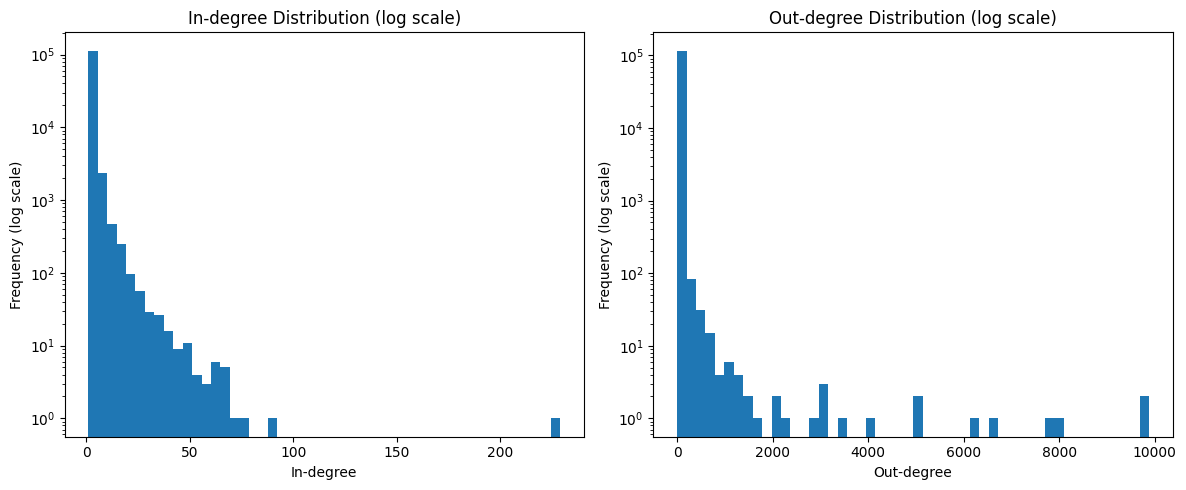

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(in_degrees, bins=50, log=True)
plt.title("In-degree Distribution (log scale)")
plt.xlabel("In-degree")
plt.ylabel("Frequency (log scale)")

plt.subplot(1,2,2)
plt.hist(out_degrees, bins=50, log=True)
plt.title("Out-degree Distribution (log scale)")
plt.xlabel("Out-degree")
plt.ylabel("Frequency (log scale)")

plt.tight_layout()
plt.show()

In [34]:
import powerlaw
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

fit = powerlaw.Fit(in_degrees) 

Calculating best minimal value for power law fit


In [35]:
fit.power_law.alpha

np.float64(3.537805053120975)

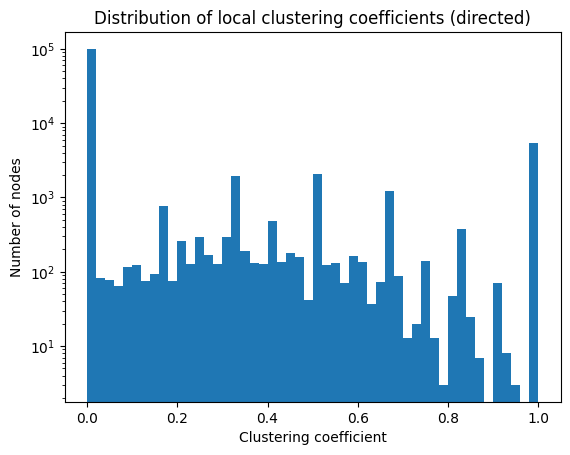

In [36]:
clustering=nx.clustering(G)

plt.hist(clustering.values(), bins=50)
plt.yscale('log')
plt.xlabel("Clustering coefficient")
plt.ylabel("Number of nodes")
plt.title("Distribution of local clustering coefficients (directed)")
plt.show()

In [37]:
sccs = list(nx.strongly_connected_components(G))
largest_scc = max(sccs, key=len)
print(f"Strongly connected component size: {len(largest_scc)}")
wccs = list(nx.weakly_connected_components(G))
largest_wcc = max(wccs, key=len)
print(f"Weakly connected component size: {len(largest_wcc)}")

Strongly connected component size: 516
Weakly connected component size: 116245


In [38]:
nx.degree_pearson_correlation_coefficient(G,x='out',y='in')

-0.1679239956302329

In [39]:
nx.degree_assortativity_coefficient(G,'out','in')

-0.16792399563023322

In [12]:
nx.degree_pearson_correlation_coefficient(G,x='in',y='out')

0.46282137243249977

In [40]:
nx.community.louvain_communities(G.to_undirected(), seed=123)

[{'Fickelster',
  'Kimchimogwai',
  'PeskyBird',
  'SaturnRing101',
  'XNotSerumX',
  'fruityachuuya',
  'gayleprechaun',
  'lovemenormally',
  'phobilistic',
  'pogtato',
  'sirino4',
  'slasmic',
  'stonedrosess'},
 {'AgentKenaki',
  'Ahten_Xevious',
  'AnEarwigsGuide',
  'AnthonyAlm',
  'Asherrrr575',
  'Big_Jilm96',
  'Bugzi_',
  'CEMENTBRICK',
  'Cakeash',
  'CatWithoutClaws',
  'Cell44_',
  'ChileMorro',
  'Chillytid',
  'ComputerHermit',
  'ConkFunky',
  'Corehero_',
  'CristauxFeur',
  'CurlyBoy_',
  'D333DS',
  'Dragon2theMax',
  'Ed_Likes_Music',
  'Ekebis',
  'ElSombo',
  'Facebook_dad',
  'Farboro',
  'Farmenes',
  'Fatumbii',
  'FeebowlCS',
  'FloydienSlip',
  'GinQuickspear',
  'Greengumpstump',
  'HamStar_',
  'Jax_F',
  'Jello3660',
  'Jessdog57329',
  'Johnfrompizza',
  'Johnnumber5',
  'Justaordguy',
  'KiaroMin',
  'KimiReal',
  'Malmo_',
  'MarkernFeline',
  'Maukeiv',
  'Naomimeyer133',
  'NoiseAss',
  'NowWithout',
  'OMSPainter',
  'Oldcaroil',
  'Oppoi',
  'Pepp

In [42]:
communities_louvain = nx.community.louvain_communities(G, seed=123)
node_community_map = {}
for i, community in enumerate(communities_louvain):
    for node in community:
        node_community_map[node] = i
print(f"communities: {len(communities_louvain)}")
# Assign community as node attribute (optional)
nx.set_node_attributes(G, node_community_map, 'community')

# Get colors for communities
colors = [node_community_map[node] for node in G.nodes()]

# Draw graph with nodes colored by community
pos = nx.spring_layout(G, seed=42)  # fixed seed for reproducible layout
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.get_cmap('tab20'), node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Louvain communities in Last.fm graph")
plt.axis('off')
plt.show()

communities: 40


KeyboardInterrupt: 

In [41]:
communities = list(nx.community.label_propagation_communities(G.to_undirected()))
print(f"Detected {len(communities)} communities via label propagation")

Detected 447 communities via label propagation
